In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r"/Users/tawfeeq/Downloads/Amazon data.csv")
df

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399,"1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199,349,43%,4,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199,"1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329,699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154,399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,379,919,59%,4,"1,090",SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"2,280","3,045",25%,4.1,"4,118","230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the measuri...",https:

In [3]:
df1 = df.copy()

In [4]:
df1['lable_encoder_cat'] = df1['category'].astype('category').cat.codes

In [5]:
df1['review_title_clean'] = (
    df1['review_title']
    .fillna('')  # Handle missing values
    .str.lower()  # Lowercase all text
    .str.replace(r'[^a-z0-9\s]', ' ', regex=True)  # Remove special characters
    .str.replace(r'\s+', ' ', regex=True)  # Remove extra spaces
    .str.strip()  # Remove leading/trailing whitespace
)
df1["review_title_clean"]

0       satisfied charging is really fast value for mo...
1       a good braided cable for your type c device go...
2       good speed for earlier versions good product w...
3       good product good one nice really nice product...
4       as good as original decent good one for second...
                              ...                        
1460    received the product without spanner excellent...
1461    ok everything was good couldn t return bcoz i ...
1462    very good work but front melt after 2 month go...
1463    fan speed is slow good quality good product go...
1464    works perfect ok good product nice product rec...
Name: review_title_clean, Length: 1465, dtype: object

In [6]:
df1.drop(columns=['review_title'], inplace=True)

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1['lable_encoder_cat'] = le.fit_transform(df1['category'])

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=100, stop_words='english')
le_rvc = LabelEncoder()
df1["label_encoder_rt"] = le_rvc.fit_transform(df1['review_title_clean'].astype(str))  # Input features (sparse matrix)

In [9]:
df1 = df1.drop('category', axis = 1)

In [10]:
le_user = LabelEncoder()
le_product = LabelEncoder()

df1['label_encoder_un'] = le_user.fit_transform(df1['user_name'].astype(str))
df1['label_encoder_pn'] = le_product.fit_transform(df1['product_name'].astype(str))

In [11]:
df1.columns

Index(['product_id', 'product_name', 'discounted_price', 'actual_price',
       'discount_percentage', 'rating', 'rating_count', 'about_product',
       'user_id', 'user_name', 'review_id', 'review_content', 'img_link',
       'product_link', 'lable_encoder_cat', 'review_title_clean',
       'label_encoder_rt', 'label_encoder_un', 'label_encoder_pn'],
      dtype='object')

In [12]:
df1 = df1.drop('review_title_clean', axis = 1)
df1

,product_id,product_name,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_content,img_link,product_link,lable_encoder_cat,label_encoder_rt,label_encoder_un,label_encoder_pn
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,399,"1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,10,925,522,1158
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,199,349,43%,4,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,10,8,207,134
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,199,"1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,10,492,482,1023
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,329,699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,10,407,614,1264
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,154,399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,10,43,1139,829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,379,919,59%,4,"1,090",SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...,192,912,646,696
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,"2,280","3,045",25%,4.1,"4,118","230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,got everything as mentioned but the measuri...",https://m.media-amazon.com/images/I/41gzDxk4+k...,https://www.amazon.in/Prestige-Delight-PRWO-1-...,172,812,537,850
1462,B009P2LIL4,Bajaj Majesty RX10 2000 Watts Heat Convector R...,"2,219","3,080",28%,3.6,468,International design and styling|Two heat sett...,"AGVPWCMAHYQWJOQKMUJN4DW3KM5Q,AF4Q3E66MY4SR7YQZ...","Nehal Desai,Danish Parwez,Amazon Customer,Amaz...","R1TLRJVW4STY5I,R2O455KRN493R1,R3Q5MVGBRIAS2G,R...","plastic but cool body ,u have to find sturdy s...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Bajaj-RX-10-2000-Watt-Co...,138,1

In [13]:
df1 = df1.drop('product_name', axis = 1)
df1

,product_id,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_content,img_link,product_link,lable_encoder_cat,label_encoder_rt,label_encoder_un,label_encoder_pn
0,B07JW9H4J1,399,"1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,10,925,522,1158
1,B098NS6PVG,199,349,43%,4,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,10,8,207,134
2,B096MSW6CT,199,"1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,10,492,482,1023
3,B08HDJ86NZ,329,699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,10,407,614,1264
4,B08CF3B7N1,154,399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,10,43,1139,829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,379,919,59%,4,"1,090",SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...,192,912,646,696
1461,B01M6453MB,"2,280","3,045",25%,4.1,"4,118","230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,got everything as mentioned but the measuri...",https://m.media-amazon.com/images/I/41gzDxk4+k...,https://www.amazon.in/Prestige-Delight-PRWO-1-...,172,812,537,850
1462,B009P2LIL4,"2,219","3,080",28%,3.6,468,International design and styling|Two heat sett...,"AGVPWCMAHYQWJOQKMUJN4DW3KM5Q,AF4Q3E66MY4SR7YQZ...","Nehal Desai,Danish Parwez,Amazon Customer,Amaz...","R1TLRJVW4STY5I,R2O455KRN493R1,R3Q5MVGBRIAS2G,R...","plastic but cool body ,u have to find sturdy s...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Bajaj-RX-10-2000-Watt-Co...,138,1092,596,164
1463,B00J5DYCCA,"1,399","1,890",26%,4,"8,031",Fan sweep area: 230 MM ; Noise level: (40 - 45...,"AF2JQCLSCY3QJATWUNNHUSVUPNQQ,AFDMLUXC5LS5RXDJS...","Shubham Dubey,E.GURUBARAN,Mayank S.,eusuf khan...","R39Q2Y79MM9SWK,R3079BG1NIH6MB,R29A31ZELTZNJM,R...",I have installed this in my kitchen working fi...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Havells-Ventilair-230mm-...,129

In [14]:
le_rc = LabelEncoder()

df1['label_encoder_rc'] = le_rc.fit_transform(df1['review_content'].astype(str))

In [15]:
df1

,product_id,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_content,img_link,product_link,lable_encoder_cat,label_encoder_rt,label_encoder_un,label_encoder_pn,label_encoder_rc
0,B07JW9H4J1,399,"1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,10,925,522,1158,604
1,B098NS6PVG,199,349,43%,4,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,10,8,207,134,413
2,B096MSW6CT,199,"1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,10,492,482,1023,674
3,B08HDJ86NZ,329,699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,10,407,614,1264,269
4,B08CF3B7N1,154,399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,10,43,1139,829,120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,379,919,59%,4,"1,090",SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...,192,912,646,696,425
1461,B01M6453MB,"2,280","3,045",25%,4.1,"4,118","230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,got everything as mentioned but the measuri...",https://m.media-amazon.com/images/I/41gzDxk4+k...,https://www.amazon.in/Prestige-Delight-PRWO-1-...,172,812,537,850,1184
1462,B009P2LIL4,"2,219","3,080",28%,3.6,468,International design and styling|Two heat sett...,"AGVPWCMAHYQWJOQKMUJN4DW3KM5Q,AF4Q3E66MY4SR7YQZ...","Nehal Desai,Danish Parwez,Amazon Customer,Amaz...","R1TLRJVW4STY5I,R2O455KRN493R1,R3Q5MVGBRIAS2G,R...","plastic but cool body ,u have to find sturdy s...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Bajaj-RX-10-2000-Watt-Co...,138,1092,596,164,1186
1463,B00J5DYCCA,"1,399","1,890",26%,4,"8,031",Fan sweep area: 230 MM ; Noise level: (40 - 45...,"AF2JQCLSCY3QJATWUNNHUSVUPNQQ,AFDMLUXC5LS5RXDJS...","Shubham Dubey,E.GURUBARAN,Mayank S.,eusuf khan...","R39Q2Y79MM9SWK,R3079BG1NIH6MB,R29A31ZELTZNJM,R...",I have installed this in my kitchen working fi...,https://m.media-amazon.com/images/W/WEBP_40237..

In [16]:
df1 = df1.drop(['img_link','product_link','review_content','about_product','user_name'], axis = 1)
df1

,product_id,discounted_price,actual_price,discount_percentage,rating,rating_count,user_id,review_id,lable_encoder_cat,label_encoder_rt,label_encoder_un,label_encoder_pn,label_encoder_rc
0,B07JW9H4J1,399,"1,099",64%,4.2,"24,269","AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...",10,925,522,1158,604
1,B098NS6PVG,199,349,43%,4,"43,994","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...",10,8,207,134,413
2,B096MSW6CT,199,"1,899",90%,3.9,"7,928","AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...",10,492,482,1023,674
3,B08HDJ86NZ,329,699,53%,4.2,"94,363","AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...",10,407,614,1264,269
4,B08CF3B7N1,154,399,61%,4.2,"16,905","AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...",10,43,1139,829,120
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,379,919,59%,4,"1,090","AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...",192,912,646,696,425
1461,B01M6453MB,"2,280","3,045",25%,4.1,"4,118","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...",172,812,537,850,1184
1462,B009P2LIL4,"2,219","3,080",28%,3.6,468,"AGVPWCMAHYQWJOQKMUJN4DW3KM5Q,AF4Q3E66MY4SR7YQZ...","R1TLRJVW4STY5I,R2O455KRN493R1,R3Q5MVGBRIAS2G,R...",138,1092,596,164,1186
1463,B00J5DYCCA,"1,399","1,890",26%,4,"8,031","AF2JQCLSCY3QJATWUNNHUSVUPNQQ,AFDMLUXC5LS5RXDJS...","R39Q2Y79MM9SWK,R3079BG1NIH6MB,R29A31ZELTZNJM,R...",129,217,885,462,375


In [17]:
df1.dtypes

product_id             object
discounted_price       object
actual_price           object
discount_percentage    object
rating                 object
rating_count           object
user_id                object
review_id              object
lable_encoder_cat       int64
label_encoder_rt        int64
label_encoder_un        int64
label_encoder_pn        int64
label_encoder_rc        int64
dtype: object

In [18]:
numerical = df1.select_dtypes(include = 'number')
categorical = df1.select_dtypes(exclude = 'number')

In [19]:
from sklearn.preprocessing import StandardScaler
exclude_cols = ['lable_encoder_cat', 'label_encoder_rt', 'label_encoder_un', 'label_encoder_pn', 'label_encoder_rc']

# Step 2: Find numeric columns and subtract excluded ones
numeric_cols = df1.select_dtypes(include=['int32', 'int64', 'float64']).columns
cols_to_scale = [col for col in numeric_cols if col not in exclude_cols]

# Step 3: Scale only if there's something to scale
scaler = StandardScaler()
df1_scaled = df1.copy()

if cols_to_scale:
    df1_scaled[cols_to_scale] = scaler.fit_transform(df1[cols_to_scale])
else:
    print(" No numeric columns to scale (excluding label-encoded columns).")


 No numeric columns to scale (excluding label-encoded columns).


In [20]:
from sklearn.preprocessing import StandardScaler
import numpy as np

cols_to_scale = ['discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count']

# Step 1: Clean all unwanted characters and convert to float
for col in cols_to_scale:
    df1[col] = (
        df1[col]
        .astype(str)
        .str.replace(r'[^0-9.]', '', regex=True)  # Remove everything except digits and dots
        .replace('', np.nan)                     # Convert empty strings to NaN
        .astype(float)                           # Convert to float
    )
    print(df1[col].unique())
# Step 2: Fill NaNs (you can also use df1.dropna()) # look on it
df1[cols_to_scale] = df1[cols_to_scale].fillna(0)

# Step 3: Scale
scaler = StandardScaler()
df1_scaled = df1.copy()
df1_scaled[cols_to_scale] = scaler.fit_transform(df1[cols_to_scale])


[3.99000e+02 1.99000e+02 3.29000e+02 1.54000e+02 1.49000e+02 1.76630e+02
 2.29000e+02 4.99000e+02 2.99000e+02 2.19000e+02 3.50000e+02 1.59000e+02
 3.49000e+02 1.39990e+04 2.49000e+02 1.34900e+04 9.70000e+02 2.79000e+02
 5.90000e+01 1.14990e+04 1.49990e+04 1.79000e+02 3.89000e+02 5.99000e+02
 9.90000e+01 8.99000e+02 3.29990e+04 2.09000e+02 1.99990e+04 9.99000e+02
 3.33000e+02 5.07000e+02 3.09000e+02 1.19900e+03 7.99000e+02 6.99900e+03
 2.30000e+02 6.49000e+02 1.59990e+04 3.48000e+02 3.29900e+04 1.39000e+02
 2.63000e+02 7.99900e+03 1.59900e+03 2.69990e+04 1.15000e+02 1.09010e+04
 1.43400e+03 7.29900e+03 3.25000e+02 2.99990e+04 2.79990e+04 3.09900e+04
 2.69000e+02 2.49990e+04 1.89900e+04 2.90000e+02 3.45000e+02 1.09900e+03
 7.19000e+02 8.49000e+02 2.19990e+04 4.49000e+02 3.79990e+04 7.39000e+03
 2.73100e+02 1.59900e+04 2.10000e+02 1.29900e+03 3.47000e+02 2.28000e+02
 1.49900e+03 8.49900e+03 2.09900e+04 9.99900e+03 4.89000e+02 2.39990e+04
 6.89000e+02 1.69900e+03 6.55000e+02 7.49000e+02 1.

In [21]:
df1_scaled

,product_id,discounted_price,actual_price,discount_percentage,rating,rating_count,user_id,review_id,lable_encoder_cat,label_encoder_rt,label_encoder_un,label_encoder_pn,label_encoder_rc
0,B07JW9H4J1,-0.392731,-0.399774,0.754029,0.342075,0.140428,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...",10,925,522,1158,604
1,B098NS6PVG,-0.421541,-0.468764,-0.216911,-0.302064,0.602205,"AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...",10,8,207,134,413
2,B096MSW6CT,-0.421541,-0.326185,1.956146,-0.624134,-0.242127,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...",10,492,482,1023,674
3,B08HDJ86NZ,-0.402814,-0.436569,0.245441,0.342075,1.781381,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...",10,407,614,1264,269
4,B08CF3B7N1,-0.428024,-0.464165,0.615323,0.342075,-0.031969,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...",10,43,1139,829,120
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,-0.395612,-0.416332,0.522853,-0.302064,-0.402210,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...",192,912,646,696,425
1461,B01M6453MB,-0.121769,-0.220768,-1.049146,0.020006,-0.331322,"AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...",172,812,537,850,1184
1462,B009P2LIL4,-0.130556,-0.217548,-0.910440,-1.590343,-0.416771,"AGVPWCMAHYQWJOQKMUJN4DW3KM5Q,AF4Q3E66MY4SR7YQZ...","R1TLRJVW4STY5I,R2O455KRN493R1,R3Q5MVGBRIAS2G,R...",138,1092,596,164,1186
1463,B00J5DYCCA,-0.248679,-0.327013,-1.002910,-0.302064,-0.239716,"AF2JQCLSCY3QJATWUNNHUSVUPNQQ,AFDMLUXC5LS5RXDJS...","R39Q2Y79MM9SWK,R3079BG1NIH6MB,R29A31ZELTZNJM,R...",129,217,885,462,375


In [22]:
no_outlier = df1_scaled.copy()

def outlier_cleanup(col):
    # Calculate IQR and outlier fences
    q1 = no_outlier[col].quantile(0.25)
    q3 = no_outlier[col].quantile(0.75)
    iqr = q3 - q1
    lf = q1 - (1.5 * iqr)  # lower fence
    uf = q3 + (1.5 * iqr)  # upper fence

    # Check column type for proper handling
    col_type = str(no_outlier[col].dtype)

    # Apply outlier treatment
    if col_type in ["int64"]:
        no_outlier.loc[no_outlier[col] < lf, col] = int(round(lf))
        no_outlier.loc[no_outlier[col] > uf, col] = int(round(uf))
    elif col_type in ["float64"]:
        no_outlier.loc[no_outlier[col] < lf, col] = lf
        no_outlier.loc[no_outlier[col] > uf, col] = uf


In [23]:
# Apply to numeric columns only
numeric_cols = no_outlier.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    outlier_cleanup(col)


In [24]:
numeric_cols

Index(['discounted_price', 'actual_price', 'discount_percentage', 'rating',
       'rating_count', 'lable_encoder_cat', 'label_encoder_rt',
       'label_encoder_un', 'label_encoder_pn', 'label_encoder_rc'],
      dtype='object')

In [25]:
no_outlier

,product_id,discounted_price,actual_price,discount_percentage,rating,rating_count,user_id,review_id,lable_encoder_cat,label_encoder_rt,label_encoder_un,label_encoder_pn,label_encoder_rc
0,B07JW9H4J1,-0.392731,-0.399774,0.754029,0.342075,0.140428,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...",10,925,522,1158,604
1,B098NS6PVG,-0.421541,-0.468764,-0.216911,-0.302064,0.545059,"AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...",10,8,207,134,413
2,B096MSW6CT,-0.421541,-0.326185,1.956146,-0.624134,-0.242127,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...",10,492,482,1023,674
3,B08HDJ86NZ,-0.402814,-0.436569,0.245441,0.342075,0.545059,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...",10,407,614,1264,269
4,B08CF3B7N1,-0.428024,-0.464165,0.615323,0.342075,-0.031969,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...",10,43,1139,829,120
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,-0.395612,-0.416332,0.522853,-0.302064,-0.402210,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...",192,912,646,696,425
1461,B01M6453MB,-0.121769,-0.220768,-1.049146,0.020006,-0.331322,"AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...",172,812,537,850,1184
1462,B009P2LIL4,-0.130556,-0.217548,-0.910440,-1.590343,-0.416771,"AGVPWCMAHYQWJOQKMUJN4DW3KM5Q,AF4Q3E66MY4SR7YQZ...","R1TLRJVW4STY5I,R2O455KRN493R1,R3Q5MVGBRIAS2G,R...",138,1092,596,164,1186
1463,B00J5DYCCA,-0.248679,-0.327013,-1.002910,-0.302064,-0.239716,"AF2JQCLSCY3QJATWUNNHUSVUPNQQ,AFDMLUXC5LS5RXDJS...","R39Q2Y79MM9SWK,R3079BG1NIH6MB,R29A31ZELTZNJM,R...",129,217,885,462,375


In [26]:
no_outlier.dtypes

product_id              object
discounted_price       float64
actual_price           float64
discount_percentage    float64
rating                 float64
rating_count           float64
user_id                 object
review_id               object
lable_encoder_cat        int64
label_encoder_rt         int64
label_encoder_un         int64
label_encoder_pn         int64
label_encoder_rc         int64
dtype: object

In [27]:
df["category"].unique()

array(['Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables',
       'Computers&Accessories|NetworkingDevices|NetworkAdapters|WirelessUSBAdapters',
       'Electronics|HomeTheater,TV&Video|Accessories|Cables|HDMICables',
       'Electronics|HomeTheater,TV&Video|Televisions|SmartTelevisions',
       'Electronics|HomeTheater,TV&Video|Accessories|RemoteControls',
       'Electronics|HomeTheater,TV&Video|Televisions|StandardTelevisions',
       'Electronics|HomeTheater,TV&Video|Accessories|TVMounts,Stands&Turntables|TVWall&CeilingMounts',
       'Electronics|HomeTheater,TV&Video|Accessories|Cables|RCACables',
       'Electronics|HomeAudio|Accessories|SpeakerAccessories|Mounts',
       'Electronics|HomeTheater,TV&Video|Accessories|Cables|OpticalCables',
       'Electronics|HomeTheater,TV&Video|Projectors',
       'Electronics|HomeAudio|Accessories|Adapters',
       'Electronics|HomeTheater,TV&Video|SatelliteEquipment|SatelliteReceivers',
       'Computers&Acces

In [28]:
df["category"].unique()

array(['Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables',
       'Computers&Accessories|NetworkingDevices|NetworkAdapters|WirelessUSBAdapters',
       'Electronics|HomeTheater,TV&Video|Accessories|Cables|HDMICables',
       'Electronics|HomeTheater,TV&Video|Televisions|SmartTelevisions',
       'Electronics|HomeTheater,TV&Video|Accessories|RemoteControls',
       'Electronics|HomeTheater,TV&Video|Televisions|StandardTelevisions',
       'Electronics|HomeTheater,TV&Video|Accessories|TVMounts,Stands&Turntables|TVWall&CeilingMounts',
       'Electronics|HomeTheater,TV&Video|Accessories|Cables|RCACables',
       'Electronics|HomeAudio|Accessories|SpeakerAccessories|Mounts',
       'Electronics|HomeTheater,TV&Video|Accessories|Cables|OpticalCables',
       'Electronics|HomeTheater,TV&Video|Projectors',
       'Electronics|HomeAudio|Accessories|Adapters',
       'Electronics|HomeTheater,TV&Video|SatelliteEquipment|SatelliteReceivers',
       'Computers&Acces

In [29]:
import pandas as pd

# Step 1: Split the category column
df_category = df['category'].str.split('|', expand=True)

# Step 2: Create mapping for known levels
category_mapping = {
    0: 'Main_Category',
    1: 'Department',
    2: 'Sub_Category_1',
    3: 'Sub_Category_2',
    4: 'Sub_Category_3',
    5: 'Sub_Category_4',
}

# Step 3: Rename the columns accordingly
df_category.rename(columns=category_mapping, inplace=True)

# Step 4: Concatenate with original DataFrame
df = pd.concat([df, df_category], axis=1)

In [30]:
df.columns

Index([         'product_id',        'product_name',            'category',
          'discounted_price',        'actual_price', 'discount_percentage',
                    'rating',        'rating_count',       'about_product',
                   'user_id',           'user_name',           'review_id',
              'review_title',      'review_content',            'img_link',
              'product_link',       'Main_Category',          'Department',
            'Sub_Category_1',      'Sub_Category_2',      'Sub_Category_3',
            'Sub_Category_4',                     6],
      dtype='object')

In [31]:
df = df.drop(['about_product', 'user_name', 'review_content','category'], axis = 1)

In [32]:
df

,product_id,product_name,discounted_price,actual_price,discount_percentage,rating,rating_count,user_id,review_id,review_title,img_link,product_link,Main_Category,Department,Sub_Category_1,Sub_Category_2,Sub_Category_3,Sub_Category_4,6
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,399,"1,099",64%,4.2,"24,269","AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,199,349,43%,4,"43,994","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,199,"1,899",90%,3.9,"7,928","AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,329,699,53%,4.2,"94,363","AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,154,399,61%,4.2,"16,905","AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,379,919,59%,4,"1,090","AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...,Home&Kitchen,Kitchen&HomeAppliances,WaterPurifiers&Accessories,WaterPurifierAccessories,None,None,None
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,"2,280","3,045",25%,4.1,"4,118","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...",https://m.media-amazon.com/images/I/41gzDxk4+k...,https://www.amazon.in/Prestige-Delight-PRWO-1-...,Home&Kitchen,Kitchen&HomeAppliances,SmallKitchenAppliances,Rice&PastaCookers,None,None,None
1462,B009P2LIL4,Bajaj Majesty RX10 2000 Watts Heat Convector R...,"2,219","3,080",28%,3.6,468,"AGVPWCMAHYQWJOQKMUJN4DW3KM5Q,AF4Q3E66MY4SR7YQZ...","R1TLRJVW4STY5I,R2O455KRN493R1,R3Q5MVGBRIAS2G,R...","very good,Work but front melt after 2 month,Go...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Bajaj-RX-10-2000-Watt-Co...,Home&Kitchen,"Heating,Cooling&AirQuality",RoomHeaters,HeatConvectors,None,None,None
1463,B00J5DYCCA,Havells Ventil Air DSP 230mm Exhaust Fan (Pist...,"1,399","1,890",26%,4,"8,031","AF2JQCLSCY3QJATWUNNHUSVUPNQQ,AFDMLUXC5LS5RXDJS...","R39Q2Y79MM9SWK,R3079BG1N

In [33]:
# import string
# df['clean_title'] = df['review_title'].str.lower().str.translate(str.maketrans('', '', string.punctuation))

In [34]:
# df['clean_title'] = df['clean_title'].str.strip()

In [35]:
# df['title_word_count'] = df['clean_title'].str.split().apply(len)

In [36]:
# positive_words = ['good', 'great', 'excellent', 'amazing', 'perfect', 'nice', 'love']
# negative_words = ['bad', 'poor', 'terrible', 'worst', 'broken', 'hate', 'disappointed']

# df['contains_positive'] = df['clean_title'].apply(lambda x: any(word in x for word in positive_words))
# df['contains_negative'] = df['clean_title'].apply(lambda x: any(word in x for word in negative_words))

In [37]:
 # df

In [38]:
df["Department"].unique()

array(['Accessories&Peripherals', 'NetworkingDevices',
       'HomeTheater,TV&Video', 'HomeAudio', 'WearableTechnology',
       'Mobiles&Accessories', 'Accessories',
       'Headphones,Earbuds&Accessories', 'ExternalDevices&DataStorage',
       'Microphones', 'GeneralPurposeBatteries&BatteryChargers',
       'OfficePaperProducts', 'CraftMaterials', 'Cameras&Photography',
       'OfficeElectronics', 'Printers,Inks&Accessories', 'Monitors',
       'Components', 'Electrical', 'Arts&Crafts', 'PowerAccessories',
       'Tablets', 'Laptops', 'Kitchen&HomeAppliances',
       'Heating,Cooling&AirQuality', 'Kitchen&Dining',
       'HomeStorage&Organization', 'CarAccessories',
       'HomeMedicalSupplies&Equipment'], dtype=object)

In [39]:
df1

,product_id,discounted_price,actual_price,discount_percentage,rating,rating_count,user_id,review_id,lable_encoder_cat,label_encoder_rt,label_encoder_un,label_encoder_pn,label_encoder_rc
0,B07JW9H4J1,399.0,1099.0,64.0,4.2,24269.0,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...",10,925,522,1158,604
1,B098NS6PVG,199.0,349.0,43.0,4.0,43994.0,"AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...",10,8,207,134,413
2,B096MSW6CT,199.0,1899.0,90.0,3.9,7928.0,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...",10,492,482,1023,674
3,B08HDJ86NZ,329.0,699.0,53.0,4.2,94363.0,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...",10,407,614,1264,269
4,B08CF3B7N1,154.0,399.0,61.0,4.2,16905.0,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...",10,43,1139,829,120
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,379.0,919.0,59.0,4.0,1090.0,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...",192,912,646,696,425
1461,B01M6453MB,2280.0,3045.0,25.0,4.1,4118.0,"AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...",172,812,537,850,1184
1462,B009P2LIL4,2219.0,3080.0,28.0,3.6,468.0,"AGVPWCMAHYQWJOQKMUJN4DW3KM5Q,AF4Q3E66MY4SR7YQZ...","R1TLRJVW4STY5I,R2O455KRN493R1,R3Q5MVGBRIAS2G,R...",138,1092,596,164,1186
1463,B00J5DYCCA,1399.0,1890.0,26.0,4.0,8031.0,"AF2JQCLSCY3QJATWUNNHUSVUPNQQ,AFDMLUXC5LS5RXDJS...","R39Q2Y79MM9SWK,R3079BG1NIH6MB,R29A31ZELTZNJM,R...",129,217,885,462,375


In [40]:
df.columns

Index([         'product_id',        'product_name',    'discounted_price',
              'actual_price', 'discount_percentage',              'rating',
              'rating_count',             'user_id',           'review_id',
              'review_title',            'img_link',        'product_link',
             'Main_Category',          'Department',      'Sub_Category_1',
            'Sub_Category_2',      'Sub_Category_3',      'Sub_Category_4',
                           6],
      dtype='object')

In [41]:
df[6].unique()  # chage to sub category 5

array([None, 'GelInkRollerballPens', 'BottledInk',
       'RetractableBallpointPens', 'StickBallpointPens',
       'LiquidInkRollerballPens', 'FountainPens', 'HandheldBags'],
      dtype=object)

In [42]:
df

,product_id,product_name,discounted_price,actual_price,discount_percentage,rating,rating_count,user_id,review_id,review_title,img_link,product_link,Main_Category,Department,Sub_Category_1,Sub_Category_2,Sub_Category_3,Sub_Category_4,6
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,399,"1,099",64%,4.2,"24,269","AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,199,349,43%,4,"43,994","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,199,"1,899",90%,3.9,"7,928","AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,329,699,53%,4.2,"94,363","AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,154,399,61%,4.2,"16,905","AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,379,919,59%,4,"1,090","AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...,Home&Kitchen,Kitchen&HomeAppliances,WaterPurifiers&Accessories,WaterPurifierAccessories,None,None,None
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,"2,280","3,045",25%,4.1,"4,118","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...",https://m.media-amazon.com/images/I/41gzDxk4+k...,https://www.amazon.in/Prestige-Delight-PRWO-1-...,Home&Kitchen,Kitchen&HomeAppliances,SmallKitchenAppliances,Rice&PastaCookers,None,None,None
1462,B009P2LIL4,Bajaj Majesty RX10 2000 Watts Heat Convector R...,"2,219","3,080",28%,3.6,468,"AGVPWCMAHYQWJOQKMUJN4DW3KM5Q,AF4Q3E66MY4SR7YQZ...","R1TLRJVW4STY5I,R2O455KRN493R1,R3Q5MVGBRIAS2G,R...","very good,Work but front melt after 2 month,Go...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Bajaj-RX-10-2000-Watt-Co...,Home&Kitchen,"Heating,Cooling&AirQuality",RoomHeaters,HeatConvectors,None,None,None
1463,B00J5DYCCA,Havells Ventil Air DSP 230mm Exhaust Fan (Pist...,"1,399","1,890",26%,4,"8,031","AF2JQCLSCY3QJATWUNNHUSVUPNQQ,AFDMLUXC5LS5RXDJS...","R39Q2Y79MM9SWK,R3079BG1N

In [43]:
df["discount_percentage"] = (
        df["discount_percentage"]
        .astype(str)
        .str.replace(r'[%]', '', regex=True)  # Remove everything except digits and dots                  # Convert empty strings to NaN                          # Convert to float
    )
df

,product_id,product_name,discounted_price,actual_price,discount_percentage,rating,rating_count,user_id,review_id,review_title,img_link,product_link,Main_Category,Department,Sub_Category_1,Sub_Category_2,Sub_Category_3,Sub_Category_4,6
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,399,"1,099",64,4.2,"24,269","AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,199,349,43,4,"43,994","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,199,"1,899",90,3.9,"7,928","AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,329,699,53,4.2,"94,363","AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,154,399,61,4.2,"16,905","AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,379,919,59,4,"1,090","AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...,Home&Kitchen,Kitchen&HomeAppliances,WaterPurifiers&Accessories,WaterPurifierAccessories,None,None,None
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,"2,280","3,045",25,4.1,"4,118","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...",https://m.media-amazon.com/images/I/41gzDxk4+k...,https://www.amazon.in/Prestige-Delight-PRWO-1-...,Home&Kitchen,Kitchen&HomeAppliances,SmallKitchenAppliances,Rice&PastaCookers,None,None,None
1462,B009P2LIL4,Bajaj Majesty RX10 2000 Watts Heat Convector R...,"2,219","3,080",28,3.6,468,"AGVPWCMAHYQWJOQKMUJN4DW3KM5Q,AF4Q3E66MY4SR7YQZ...","R1TLRJVW4STY5I,R2O455KRN493R1,R3Q5MVGBRIAS2G,R...","very good,Work but front melt after 2 month,Go...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Bajaj-RX-10-2000-Watt-Co...,Home&Kitchen,"Heating,Cooling&AirQuality",RoomHeaters,HeatConvectors,None,None,None
1463,B00J5DYCCA,Havells Ventil Air DSP 230mm Exhaust Fan (Pist...,"1,399","1,890",26,4,"8,031","AF2JQCLSCY3QJATWUNNHUSVUPNQQ,AFDMLUXC5LS5RXDJS...","R39Q2Y79MM9SWK,R3079BG1NIH6MB,R29

In [44]:
df.columns

Index([         'product_id',        'product_name',    'discounted_price',
              'actual_price', 'discount_percentage',              'rating',
              'rating_count',             'user_id',           'review_id',
              'review_title',            'img_link',        'product_link',
             'Main_Category',          'Department',      'Sub_Category_1',
            'Sub_Category_2',      'Sub_Category_3',      'Sub_Category_4',
                           6],
      dtype='object')

In [45]:
df = df.rename(columns={6: "Sub_Category_5"})
df

,product_id,product_name,discounted_price,actual_price,discount_percentage,rating,rating_count,user_id,review_id,review_title,img_link,product_link,Main_Category,Department,Sub_Category_1,Sub_Category_2,Sub_Category_3,Sub_Category_4,Sub_Category_5
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,399,"1,099",64,4.2,"24,269","AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,199,349,43,4,"43,994","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,199,"1,899",90,3.9,"7,928","AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,329,699,53,4.2,"94,363","AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,154,399,61,4.2,"16,905","AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,379,919,59,4,"1,090","AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...,Home&Kitchen,Kitchen&HomeAppliances,WaterPurifiers&Accessories,WaterPurifierAccessories,None,None,None
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,"2,280","3,045",25,4.1,"4,118","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...",https://m.media-amazon.com/images/I/41gzDxk4+k...,https://www.amazon.in/Prestige-Delight-PRWO-1-...,Home&Kitchen,Kitchen&HomeAppliances,SmallKitchenAppliances,Rice&PastaCookers,None,None,None
1462,B009P2LIL4,Bajaj Majesty RX10 2000 Watts Heat Convector R...,"2,219","3,080",28,3.6,468,"AGVPWCMAHYQWJOQKMUJN4DW3KM5Q,AF4Q3E66MY4SR7YQZ...","R1TLRJVW4STY5I,R2O455KRN493R1,R3Q5MVGBRIAS2G,R...","very good,Work but front melt after 2 month,Go...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Bajaj-RX-10-2000-Watt-Co...,Home&Kitchen,"Heating,Cooling&AirQuality",RoomHeaters,HeatConvectors,None,None,None
1463,B00J5DYCCA,Havells Ventil Air DSP 230mm Exhaust Fan (Pist...,"1,399","1,890",26,4,"8,031","AF2JQCLSCY3QJATWUNNHUSVUPNQQ,AFDMLUXC5LS5RXDJS...","R39Q2Y79MM9SWK,R3079

In [46]:
df.isnull().sum()

product_id                0
product_name              0
discounted_price          0
actual_price              0
discount_percentage       0
rating                    0
rating_count              2
user_id                   0
review_id                 0
review_title              0
img_link                  0
product_link              0
Main_Category             0
Department                0
Sub_Category_1            8
Sub_Category_2          165
Sub_Category_3          943
Sub_Category_4         1380
Sub_Category_5         1452
dtype: int64

In [47]:
df.dtypes

product_id             object
product_name           object
discounted_price       object
actual_price           object
discount_percentage    object
rating                 object
rating_count           object
user_id                object
review_id              object
review_title           object
img_link               object
product_link           object
Main_Category          object
Department             object
Sub_Category_1         object
Sub_Category_2         object
Sub_Category_3         object
Sub_Category_4         object
Sub_Category_5         object
dtype: object

In [48]:
df.isnull().sum()

product_id                0
product_name              0
discounted_price          0
actual_price              0
discount_percentage       0
rating                    0
rating_count              2
user_id                   0
review_id                 0
review_title              0
img_link                  0
product_link              0
Main_Category             0
Department                0
Sub_Category_1            8
Sub_Category_2          165
Sub_Category_3          943
Sub_Category_4         1380
Sub_Category_5         1452
dtype: int64

In [49]:
df["Sub_Category_1"] = df["Sub_Category_1"].fillna("Not Available")
df["Sub_Category_2"] = df["Sub_Category_2"].fillna("Not Available")
df["Sub_Category_3"] = df["Sub_Category_3"].fillna("Not Available")
df["Sub_Category_4"] = df["Sub_Category_4"].fillna("Not Available")
df["Sub_Category_5"] = df["Sub_Category_5"].fillna("Not Available")

In [50]:
df.isnull().sum()

product_id             0
product_name           0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
user_id                0
review_id              0
review_title           0
img_link               0
product_link           0
Main_Category          0
Department             0
Sub_Category_1         0
Sub_Category_2         0
Sub_Category_3         0
Sub_Category_4         0
Sub_Category_5         0
dtype: int64

In [51]:
df["Department"].unique()

array(['Accessories&Peripherals', 'NetworkingDevices',
       'HomeTheater,TV&Video', 'HomeAudio', 'WearableTechnology',
       'Mobiles&Accessories', 'Accessories',
       'Headphones,Earbuds&Accessories', 'ExternalDevices&DataStorage',
       'Microphones', 'GeneralPurposeBatteries&BatteryChargers',
       'OfficePaperProducts', 'CraftMaterials', 'Cameras&Photography',
       'OfficeElectronics', 'Printers,Inks&Accessories', 'Monitors',
       'Components', 'Electrical', 'Arts&Crafts', 'PowerAccessories',
       'Tablets', 'Laptops', 'Kitchen&HomeAppliances',
       'Heating,Cooling&AirQuality', 'Kitchen&Dining',
       'HomeStorage&Organization', 'CarAccessories',
       'HomeMedicalSupplies&Equipment'], dtype=object)

In [52]:
df["Sub_Category_1"].unique()

array(['Cables&Accessories', 'NetworkAdapters', 'Accessories',
       'Televisions', 'Projectors', 'SatelliteEquipment',
       'MediaStreamingDevices', 'AVReceivers&Amplifiers', 'Speakers',
       'SmartWatches', 'MobileAccessories', 'Smartphones&BasicMobiles',
       'MemoryCards', 'Headphones', 'LaptopAccessories', 'Adapters',
       'PenDrives', 'Keyboards,Mice&InputDevices', 'Condenser',
       'DisposableBatteries', 'Paper', 'Scrapbooking',
       'ExternalHardDisks', 'VideoCameras', 'Calculators',
       'Repeaters&Extenders', 'Inks,Toners&Cartridges',
       'PCGamingPeripherals', 'PaintingMaterials', 'HardDiskBags',
       'Flashes', 'Not Available', 'Routers', 'RechargeableBatteries',
       'USBGadgets', 'SecurityCameras', 'TabletAccessories', 'USBHubs',
       'Audio&VideoAccessories', 'ExternalMemoryCardReaders', 'Memory',
       'UninterruptedPowerSupplies', 'Cases', 'Adapters&Multi-Outlets',
       'InternalSolidStateDrives', 'DataCards&Dongles',
       'DrawingMaterials

In [53]:
list1 = ["product_name","product_id","user_id","review_id","Main_Category","Department","Sub_Category_1","Sub_Category_2","Sub_Category_3","Sub_Category_4","Sub_Category_5"]

In [54]:
for i in list1:
    df[i] = df[i].astype("category")

In [55]:
import numpy as np
df["discount_percentage"] = (
        df["discount_percentage"]
        .astype(str)
        .str.replace(r'[%]', '', regex=True)
    )

df["discounted_price"] = (
        df["discounted_price"]
        .astype(str)
        .str.replace(r'[,]', '', regex=True)                        
    )

df["actual_price"] = (
        df["actual_price"]
        .astype(str)
        .str.replace(r'[,]', '', regex=True)                  
    )
df["rating_count"] = (
        df["actual_price"]
        .astype(str)
        .str.replace(r'[,]', '', regex=True)                    
    )


df["rating"] = (
    df["rating"]
    .astype(str)
    .str.replace(r"[,|']", '', regex=True)   
    .replace('', np.nan)
)


In [56]:
df["discounted_price"] = df["discounted_price"].astype("float")
df["actual_price"] = df["actual_price"].astype("float")
df["discount_percentage"] = df["discount_percentage"].astype("int")
df["rating_count"] = df["rating_count"].astype("float")

In [57]:
df["rating"] = df["rating"].astype("float")

In [58]:
categ = df.select_dtypes(exclude = 'number')
numerical = df.select_dtypes(include = 'number')

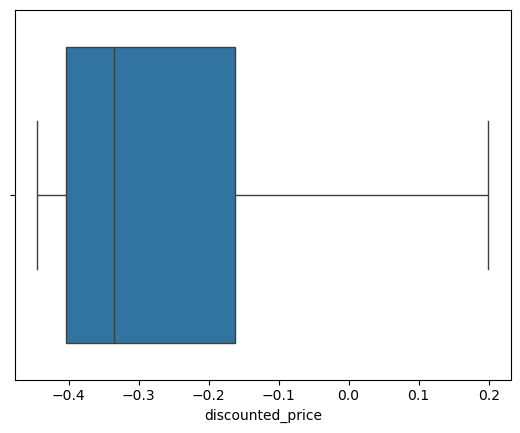

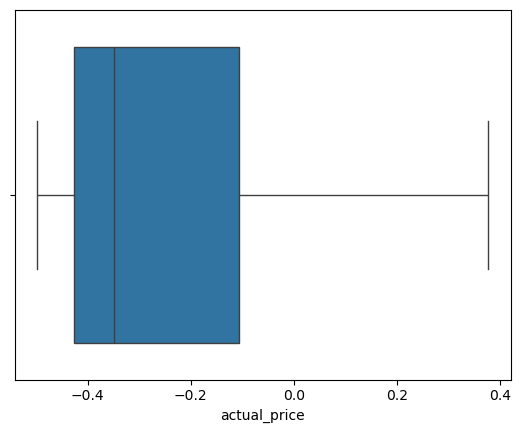

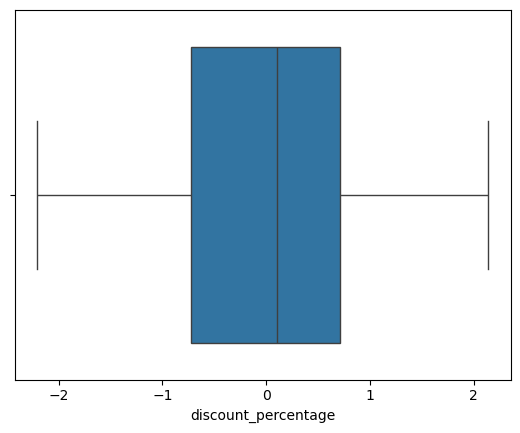

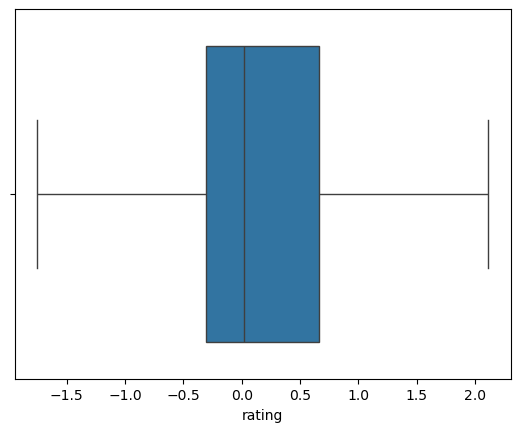

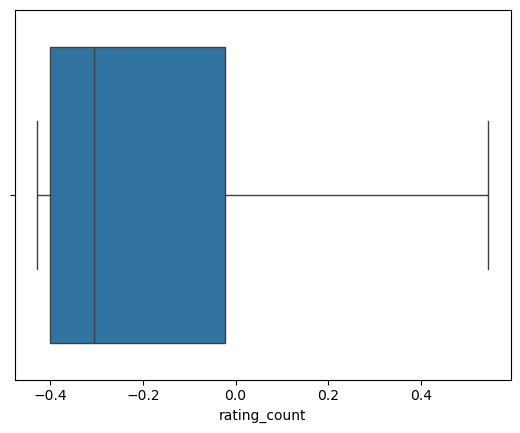

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
for col in numerical.columns:
    sns.boxplot(x = no_outlier[col])
    plt.show()

In [60]:
df.isnull().sum()

product_id             0
product_name           0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 1
rating_count           0
user_id                0
review_id              0
review_title           0
img_link               0
product_link           0
Main_Category          0
Department             0
Sub_Category_1         0
Sub_Category_2         0
Sub_Category_3         0
Sub_Category_4         0
Sub_Category_5         0
dtype: int64

In [61]:
no_outlier = numerical.copy()

def outlier_cleanup(col):
    # Calculate IQR and outlier fences
    q1 = no_outlier[col].quantile(0.25)
    q3 = no_outlier[col].quantile(0.75)
    iqr = q3 - q1
    lf = q1 - (1.5 * iqr)  # lower fence
    uf = q3 + (1.5 * iqr)  # upper fence

    # Check column type for proper handling of integer and float types
    col_type = str(no_outlier[col].dtype)

    # Apply outlier treatment
    if col_type in ["int64"]:
        # For integer columns, round the fence values and cast them to integers
        no_outlier.loc[no_outlier[col] < lf, col] = int(round(lf))
        no_outlier.loc[no_outlier[col] > uf, col] = int(round(uf))
    else:
        # For float columns, directly assign the fence values
        no_outlier.loc[no_outlier[col] < lf, col] = lf
        no_outlier.loc[no_outlier[col] > uf, col] = uf

In [62]:
for col in numerical.columns:
    outlier_cleanup(col)

In [63]:
# Probability of selected product that has a rating above 4.0

rating = df[df["rating"] > 4.0]
len_rat = len(rating)
len_df = len(df)
p1 = len_rat / len_df
print(p1)

0.6341296928327645


In [64]:
df.columns

Index(['product_id', 'product_name', 'discounted_price', 'actual_price',
       'discount_percentage', 'rating', 'rating_count', 'user_id', 'review_id',
       'review_title', 'img_link', 'product_link', 'Main_Category',
       'Department', 'Sub_Category_1', 'Sub_Category_2', 'Sub_Category_3',
       'Sub_Category_4', 'Sub_Category_5'],
      dtype='object')

In [65]:
# Probability given that a product has high discount(> 50%) and rating above 4.0

di_r = df[(df['discount_percentage'] > 50) & (df['rating'] > 4.0)]
len_di_r = len(di_r)
p2 = len_di_r / len_df
p2

0.2825938566552901

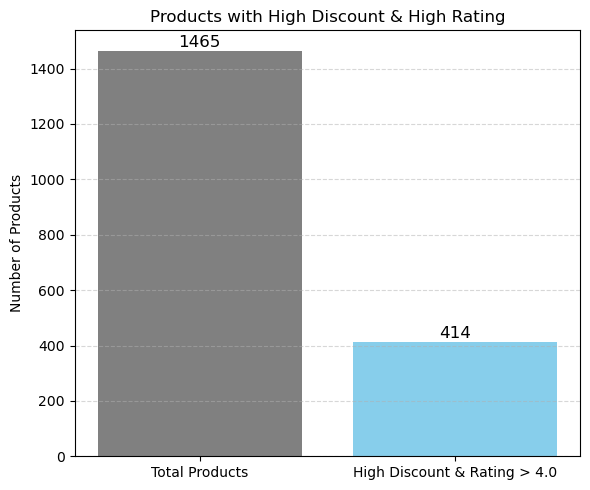

In [66]:
total_products = len(df)
high_disc_high_rating = len(df[(df['discount_percentage'] > 50) & (df['rating'] > 4.0)])
probability = high_disc_high_rating / total_products

# Bar Chart
labels = ['Total Products', 'High Discount & Rating > 4.0']
values = [total_products, high_disc_high_rating]
colors = ['gray', 'skyblue']

plt.figure(figsize=(6, 5))
bars = plt.bar(labels, values, color=colors)

# Add value labels on bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + total_products * 0.01, f'{yval}', ha='center', fontsize=12)

# Title and labels
plt.title('Products with High Discount & High Rating')
plt.ylabel('Number of Products')
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

In [67]:
# Given that product has more than 500 ratings, what is the probability that it has a rating below 3.5
df_high_count = df[df['rating_count'] > 500]
# From those, how many have rating < 3.5
low_rated_high_count = df_high_count[df['rating'] < 3.5]

# Calculate conditional probability
p3 = len(low_rated_high_count) / len(df_high_count)
p3

/var/folders/6p/5000n7hx4wb6xn2s7s0xh1tr0000gn/T/ipykernel_47951/4232751547.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  low_rated_high_count = df_high_count[df['rating'] < 3.5]


0.028112449799196786

In [68]:
# Given that main category is electronics, probability of getting rating >= 2
clothing_products = df[df['Main_Category'] == 'Electronics']
probability = clothing_products[df['rating'] >= 2]
len_pr = len(probability)
p4 = len_pr / len_df
print(f"Probability: {p4:.2f}")

Probability: 0.36


/var/folders/6p/5000n7hx4wb6xn2s7s0xh1tr0000gn/T/ipykernel_47951/1822938861.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  probability = clothing_products[df['rating'] >= 2]


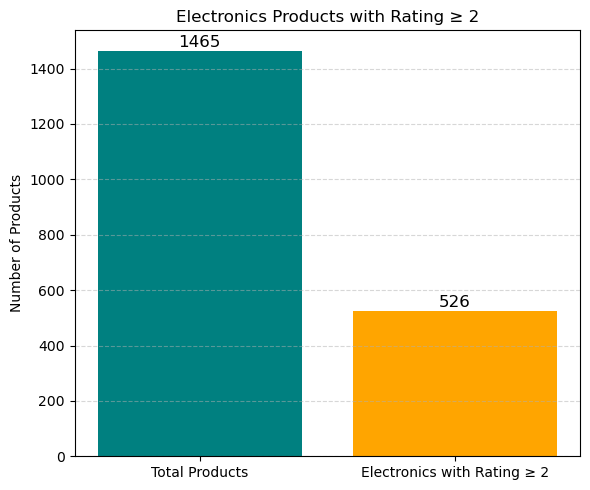

In [69]:
total_products = len(df)
electronics_high_rating = len_pr

labels = ['Total Products', 'Electronics with Rating ≥ 2']
values = [total_products, electronics_high_rating]
colors = ['teal', 'orange']

plt.figure(figsize=(6, 5))
bars = plt.bar(labels, values, color=colors)

# Annotate bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + total_products*0.01,
             f'{height}', ha='center', fontsize=12)

# Title and formatting
plt.title('Electronics Products with Rating ≥ 2')
plt.ylabel('Number of Products')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [70]:
# random sampling

rand_sample_2 = df.sample(frac = 0.2, random_state = 42)

In [71]:
# stratified sampling

grouped_df = df.groupby(["Department"])
depart = df["Department"].unique()
depart

/var/folders/6p/5000n7hx4wb6xn2s7s0xh1tr0000gn/T/ipykernel_47951/2317990503.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = df.groupby(["Department"])


['Accessories&Peripherals', 'NetworkingDevices', 'HomeTheater,TV&Video', 'HomeAudio', 'WearableTechnology', ..., 'Heating,Cooling&AirQuality', 'Kitchen&Dining', 'HomeStorage&Organization', 'CarAccessories', 'HomeMedicalSupplies&Equipment']
Length: 29
Categories (29, object): ['Accessories', 'Accessories&Peripherals', 'Arts&Crafts', 'Cameras&Photography', ..., 'PowerAccessories', 'Printers,Inks&Accessories', 'Tablets', 'WearableTechnology']

In [72]:
samples = []
for mygroup in depart:
    d_data = grouped_df.get_group(mygroup)
    # print(d_data)
    sample_data = d_data.sample(frac = 0.3, random_state = 42)
    # print(sample_data)
    samples.append(sample_data)
# print(samples)
strat_sample_df = pd.concat(samples, ignore_index = True)
strat_sample_df

/var/folders/6p/5000n7hx4wb6xn2s7s0xh1tr0000gn/T/ipykernel_47951/3303363387.py:3: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  d_data = grouped_df.get_group(mygroup)


,product_id,product_name,discounted_price,actual_price,discount_percentage,rating,rating_count,user_id,review_id,review_title,img_link,product_link,Main_Category,Department,Sub_Category_1,Sub_Category_2,Sub_Category_3,Sub_Category_4,Sub_Category_5
0,B0B2PQL5N3,"Lapster Gel Mouse pad with Wrist Rest , Gaming...",230.0,999.0,77,4.2,999.0,"AE2TSJXRS5BXE6X7WFS7HOFJKCOQ,AEQTFT2S7RDVYEGOX...","RDZVWJ2BSZH21,R2S2PTON4F7OCO,RUYKZDXCHIL0A,R1J...","Worth the proce,Can't complain for the price,G...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Lapster-Gaming-Nonslip-L...,Computers&Accessories,Accessories&Peripherals,"Keyboards,Mice&InputDevices",Keyboard&MiceAccessories,MousePads,Not Available,Not Available
1,B0B72BSW7K,SKE Bed Study Table Portable Wood Multifunctio...,263.0,699.0,62,3.5,699.0,"AECQPIQJEIF5ASVCNW43FEDLAATQ,AEO2Q72MKWA5DPWBF...","R2TD3N245ZRZKA,R2I93780O12B86,R3VTLQFO4KMHHC,R...","Good as per price,Good,Worthy for Price,Worth,...",https://m.media-amazon.com/images/I/41EbxurQID...,https://www.amazon.in/SKE-Portable-Multifuncti...,Computers&Accessories,Accessories&Peripherals,LaptopAccessories,Lapdesks,Not Available,Not Available,Not Available
2,B08R69VDHT,Pinnaclz Original Combo of 2 Micro USB Fast Ch...,115.0,499.0,77,4.0,499.0,"AEGZSNGSJJAEMJ3RRNVZTKUILOHA,AGX46OTZ7C4VDXH4U...","R2VUNGNI96EEJ7,R2JGNI2T5LVFRQ,R9ISXRV6DA0OY,RZ...","Very good product and met my need. Thanks,Dec...",https://m.media-amazon.com/images/I/41gFqSHngy...,https://www.amazon.in/Pinnaclz-Original-Micro-...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,Not Available,Not Available
3,B0BMXMLSMM,Lapster 65W compatible for OnePlus Dash Warp C...,199.0,999.0,80,4.5,999.0,"AHFENRYJG4LPXDTUGEMG335VICSQ,AGSV37DJ5QTUYOXFJ...","R14ZOPYFHOYYRQ,R1GQH74NUCJZZ7,R1BNWIYBRSI1Z6,R...","Super charger in lapster,Best among the rest,C...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Lapster-compatible-OnePl...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,Not Available,Not Available
4,B08HDH26JX,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,299.0,699.0,57,4.2,699.0,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Deuce-300-Resistant-Tran...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,Not Available,Not Available
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,B0814P4L98,PrettyKrafts Laundry Basket for clothes with L...,351.0,999.0,65,4.0,999.0,"AFY43URPP4H2YAU54BXZXHAA4PFA,AFXPNU67DDECPJPSN...","R13P4JW3JTQ20L,R2SCPX6U0LMXGX,R3L4ND79MO2CRG,R...","Good buy,Item is good and recommendable,Worth ...",https://m.media-amazon.com/images/I/41oxCycQ4B...,https://www.amazon.in/PrettyKrafts-Laundry-Bas...,Home&Kitchen,HomeStorage&Organization,LaundryOrganization,LaundryBaskets,Not Available,Not Available,Not Available
434,B08D6RCM3Q,PrettyKrafts Folding Laundry Basket for Clothe...,355.0,899.0,61,4.1,899.0,"AEOEF4FMKNN5QZZVUQDHHKWRHCGA,AEVLNWB3IQYMTNXJ5...","R3JQM04HFALWJX,R3DI9SP7OE34C9,R2RL7RJ6QY2YRW,R...","Overall good purchase,Good,Good Purchase,Ok hi...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/PrettyKrafts-Laundry-Clo...,Home&Kitchen,HomeStorage&Organization,LaundryOrganization,LaundryBaskets,Not Available,Not Available,Not Available
435,B08243SKCK,Vedini Transparent Empty Refillable Reusable F...,189.0,299.0,37,4.2,299.0,"AFA6NJKGCITRFOYKD2FMBD44UBPA,AHMZC6VKUENGIMRG2...","RA88ON37S8GZ5,R1N9K09PK3ETZK,R2HG9API98AHDB,R1...",Bht hi achi hai aur usefull b..thanx amazon......,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Vedini-Refillable-Spray-...,Home&Kitchen,HomeStorage&Organization,LaundryOrganization,IroningAccessories,SprayBottles,Not Availab

In [73]:
# H0 is mu is <= 100
# Ha is mu is > 100
# Right Tailed Test
# Testing whether the average number of ratings for clothings items is significantly greater than a Hypothesed population mean

In [163]:
from scipy.stats import norm

alpha = 0.05
sample_size = 35        # significance level
mu = 100               # hypothesized population mean

# Sample statistics
sample = df.sample(n= sample_size, random_state=42)
x_bar = sample['rating_count'].mean()
sigma = df['rating_count'].std()  # population std dev from Clothing category

# Z-statistic
z_stats = (x_bar - mu) / (sigma / np.sqrt(sample_size))

# P-value (right-tailed test)
p_value = norm.sf(z_stats)

# Critical value for right-tailed test
z_critical = norm.ppf(1 - alpha)

# Print results
print("Sample Mean:", x_bar)
print("Z-statistic:", z_stats)
print("P-value:", p_value)
print("Z-critical value:", z_critical)
print("Reject H0 (mu ≤ 100):", z_stats > z_critical)

Sample Mean: 5925.685714285714
Z-statistic: 3.1692662244577674
P-value: 0.0007641217139437886
Z-critical value: 1.644853626951472
Reject H0 (mu ≤ 100): True


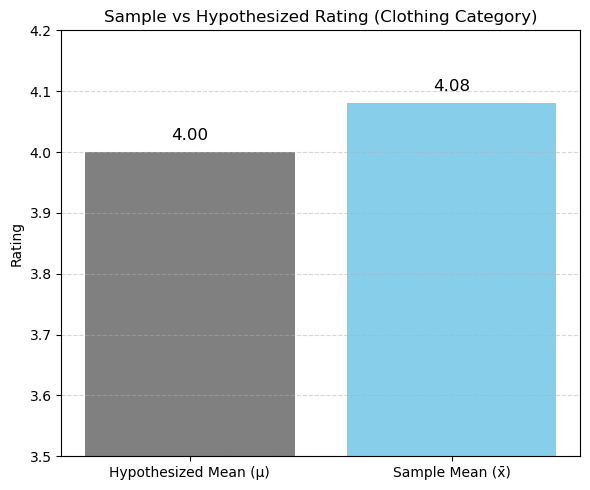

In [75]:
hypothesized_mean = 4
sample_mean = 4.0802

# Create bar chart
labels = ['Hypothesized Mean (μ)', 'Sample Mean (x̄)']
values = [hypothesized_mean, sample_mean]
colors = ['gray', 'skyblue']

plt.figure(figsize=(6, 5))
plt.bar(labels, values, color=colors)
plt.ylim(3.5, 4.2)
plt.title('Sample vs Hypothesized Rating (Clothing Category)')
plt.ylabel('Rating')
plt.grid(axis='y', linestyle='--', alpha=0.5)

for i, v in enumerate(values):
    plt.text(i, v + 0.02, f'{v:.2f}', ha='center', fontsize=12)

plt.tight_layout()
plt.show()

In [77]:
# Conclusion
# We reject the Null Hypothesis, based on the Z Test
# We fail to reject H0

In [78]:
# Business Conclusion
# Average number of ratings for clothing is greater than 100